# EDA

## analisis exploratorio de los datos

- **vamos a revisar los datos ya procesados de la carpeta ETL**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

datos_movies = pd.read_parquet("../etl/dataset_transformado/datos_primarios_movies.parquet")

In [12]:
datos_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             45376 non-null  float64       
 1   id                 45376 non-null  object        
 2   original_language  45365 non-null  object        
 3   overview           44435 non-null  object        
 4   popularity         45376 non-null  float64       
 5   release_date       45376 non-null  object        
 6   revenue            45376 non-null  float64       
 7   runtime            45130 non-null  float64       
 8   status             45296 non-null  object        
 9   tagline            20398 non-null  object        
 10  title              45376 non-null  object        
 11  vote_average       45376 non-null  float64       
 12  vote_count         45376 non-null  float64       
 13  fechas_validas     45376 non-null  datetime64[ns]
 14  retorno    

en tagline tenemos una columna con varias filas nulas

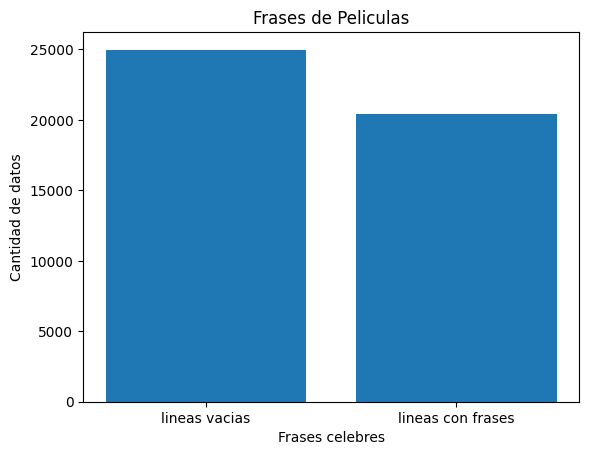

In [13]:
tagline_empty = datos_movies['tagline'].isnull().sum()
tagline_phrase = datos_movies['tagline'].notnull().sum()

plt.bar(['lineas vacias', 'lineas con frases'], [tagline_empty,tagline_phrase])
plt.ylabel('Cantidad de datos')
plt.xlabel('Frases celebres')
plt.title('Frases de Peliculas')
plt.show()

In [14]:
datos_movies = datos_movies.drop('tagline', axis=1)

###

####

In [15]:
datos_movies = datos_movies.drop(['runtime','overview','original_language','status','fechas_validas'], axis=1)

###

###

In [16]:
datos_movies.describe()

,budget,popularity,revenue,vote_average,vote_count,retorno
count,4.537600e+04,45376.000000,4.537600e+04,45376.000000,45376.000000,4.537600e+04
mean,4.232604e+06,2.926458,1.123010e+07,5.624070,110.096439,6.600428e+02
std,1.743986e+07,6.009672,6.438996e+07,1.915423,491.742894,7.469329e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.388840,0.000000e+00,5.000000,3.000000,0.000000e+00
50%,0.000000e+00,1.130454,0.000000e+00,6.000000,10.000000,0.000000e+00
75%,0.000000e+00,3.691695,0.000000e+00,6.800000,34.000000,0.000000e+00
max,3.800000e+08,547.488298,2.787965e+09,10.000000,14075.000000,1.239638e+07


In [17]:
datos_movies.head()

,budget,id,popularity,release_date,revenue,title,vote_average,vote_count,retorno
0,30000000.0,862,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,12.451801
1,65000000.0,8844,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,4.043035
2,0.0,15602,11.712900,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,0.000000
3,16000000.0,31357,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,5.090760
4,0.0,11862,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,0.000000


In [18]:
datos_movies['release_date'] = pd.to_datetime(datos_movies['release_date'])

# Crear nuevas columnas con el día, mes y año en español
datos_movies['dia'] = datos_movies['release_date'].dt.day
datos_movies['dia_semana'] = datos_movies['release_date'].dt.day_name().apply(lambda x: {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}[x])
datos_movies['mes'] = datos_movies['release_date'].dt.month.apply(lambda x: ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'][x-1])
datos_movies['anio'] = datos_movies['release_date'].dt.year

In [19]:
datos_movies = datos_movies.drop('release_date',axis=1)

In [20]:
datos_movies.to_parquet("../consultas/movies.parquet")